In [1]:
import networkx as nx
from pymatgen.core.structure import Structure
import os
os.chdir('/home/lucasperea/Documents/GithubRep/GraphMaterials/')
from GraphFunc.ZeoDataframeFunction import ZeoDataframe
from GraphFunc.ConexionFunction import Conexion
from pymatgen.io.cif import CifWriter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


In [3]:
box = np.array([6.926, 6.926, 6.410])

In [111]:
path_to_file = './Netwrk/EDI.nt2'

G = nx.Graph()
with open(path_to_file) as f:
    line = ' '

    while line:
        line = f.readline()

        if line == 'Vertex table:\n':
            
            while line:

                line = f.readline()
                
                if line == '\n':
                    break
                else:
                    line_list = line.split()
                    key = int(line_list[0])
#                     print(key)
                    coord_x = float(line_list[1])
                    coord_y = float(line_list[2])
                    coord_z = float(line_list[3])
                    min_dist_atom = float(line_list[4])
        
                    G.add_node(key, coord=np.array([coord_x, coord_y, coord_z]), rad_max_sph=min_dist_atom,
                              pagerank=1)

    #                 vertex_table = vertex_table.append({'coord_x':coord_x, 'coord_y':coord_y, 'coord_z':coord_z,
    #                                                     'min_dist_atom':min_dist_atom, 'key':key},ignore_index = True)


        x_1 = len(list(range(0,(sorted(list(G.nodes), reverse=True)[0] + 1))))
        
        
        
        if line == 'Edge table:\n':
            

            while line:

                line = f.readline()
                if line == '':
                    break
                line_list = line.split()
                origin = int(line_list[0])
                destination = int(line_list[2])
                larger_radius = float(line_list[3])
                x_sim = int(line_list[4])
                y_sim = int(line_list[5])
                z_sim = int(line_list[6])
                if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
                    G.add_edge(origin, destination, rad_max_sph=larger_radius)                    
                else:
                    
                    G.add_node(destination + x_1, coord=G.nodes[destination]['coord'] + np.array([box[0], 0, 0]),
                               rad_max_sph=G.nodes[destination]['rad_max_sph'], pagerank=1)
                    G.add_edge(origin, destination + x_1, rad_max_sph=larger_radius)   
                        
                    else:
                        pass
                    
                
                
                
#                 if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
#                     pass
#                     edge_table = edge_table.append({'origin':origin, 'destination': destination, 'x_sim':x_sim,
#                                                     'y_sim':y_sim, 'z_sim':z_sim,'larger_radius':larger_radius},
#                                                    ignore_index = True)
                    #print('change')


80
84
98
105
103
130
132
137
138
139


In [23]:
L[68]

AtlasView({17: {'rad_max_sph': 2.62603}, 67: {'rad_max_sph': 2.51601}, 138: {'rad_max_sph': 0.759739}, 69: {'rad_max_sph': 2.51601}})

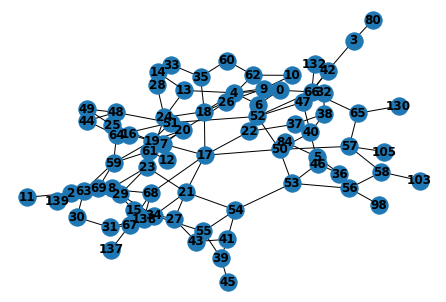

In [24]:
nx.draw(L, with_labels=True, font_weight='bold')

In [8]:
from copy import deepcopy
import copy

In [9]:
L = copy.deepcopy(G)

In [46]:
nx.relabel.relabel_nodes(L, {3:2}, copy=False)

In [43]:
L.nodes[3]

{'coord': array([6.926  , 5.88033, 1.27823]),
 'rad_max_sph': 0.0922282,
 'pagerank': 1}

In [44]:
L[3]

AtlasView({80: {'rad_max_sph': 0.0922282}, 42: {'rad_max_sph': 0.0922282}})

In [42]:
L.nodes[0]

{'coord': array([1.62685 , 0.358632, 4.85973 ]),
 'rad_max_sph': 0.248056,
 'pagerank': 1}

In [50]:
L[2]

AtlasView({80: {'rad_max_sph': 0.0922282}, 42: {'rad_max_sph': 0.0922282}})

In [68]:
K = nx.Graph()
M = nx.Graph()
Z = nx.Graph()

In [61]:
Z.add_nodes_from([K, M, H])

In [69]:
K.add_nodes_from([1, 2, 3, 4, 5])
M.add_nodes_from([1, 2, 3, 4, 5])

K.add_edges_from([(1,3), (3, 5)], weight=1)
M.add_edges_from([(2,4), (4,5)], weight=1)

In [73]:
K.add_edges_from([(2,3), (1, 2), (3,4), (4,5)], weight=1)
M.add_edges_from([(1, 2), (2,3), (3,4)], weight=1)

In [74]:
Z.add_edges_from([(K,H), (H,M)], weight=1)

In [76]:
H = nx.path_graph(10)

In [59]:
H.edges

EdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

In [78]:
for edge in H.edges:
    H[edge[0]][edge[1]]['weight'] = 1
    print(edge)
#     for attr in K.edges[edge[0], edge[1]]:
#         K.edges[edge][attr] = 1

(0, 1)
(1, 2)
(2, 3)
(3, 4)
(4, 5)
(5, 6)
(6, 7)
(7, 8)
(8, 9)


In [79]:
H[1][2]

{'weight': 1}

In [110]:
from networkx.algorithms.approximation.traveling_salesman import traveling_salesman_problem 
traveling_salesman_problem(K, nodes=[1, 5])


[1, 3, 5, 3, 1]

In [114]:
H[1][0]

{'weight': 1}

In [115]:
M = nx.Graph()

In [119]:
M.add_edge(1, 2)
M.add_node(1)
M.add_node(2)

In [120]:
nx.relabel.relabel_nodes(M, {1:0}, copy=False)

In [121]:
M.edges

EdgeView([(2, 0)])

In [122]:
M = nx.Graph(day="Friday")
M.add_edge(1, 2)
M.add_node(1)
M.add_node(2)

In [126]:
M.graph

{'day': 'Friday'}

In [ ]:
combination_vector = 